In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path

path = r'C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis'

In [3]:
df_project_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_all.pkl'))

Text(0, 0.5, '')

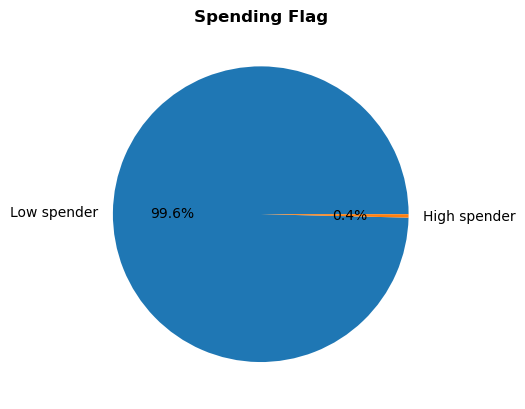

In [4]:
spender = df_project_all['spending_flag'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%')
plt.title('Spending Flag', fontweight = 'bold')
plt.ylabel(None)

In [5]:
df_project_all['spending_flag'].value_counts(dropna = False)

Low spender     32284501
High spender      120358
Name: spending_flag, dtype: int64

In [6]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [8]:
hours_price_mean = df_project_all.groupby('order_hour_of_day')['prices'].mean().sort_values(ascending = False)
hours_price_mean

order_hour_of_day
4     7.838549
5     7.828109
3     7.828003
7     7.820030
6     7.817772
22    7.816798
0     7.811106
18    7.809783
17    7.806491
15    7.805921
1     7.805621
21    7.805509
14    7.802790
16    7.802667
20    7.800318
2     7.799207
23    7.797431
19    7.794125
13    7.793386
8     7.790506
12    7.789186
11    7.772013
9     7.753542
10    7.749859
Name: prices, dtype: float64

Text(0.5, 0, 'Hour of the Day')

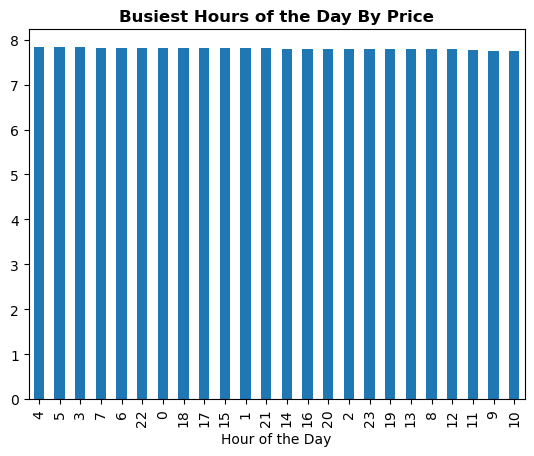

In [9]:
bar_busiest_hours_price = hours_price_mean.plot.bar(legend = None)
plt.title('Busiest Hours of the Day By Price', fontweight = 'bold')
plt.xlabel('Hour of the Day')

In [11]:
df_project_all['prices'].describe()

count    3.240486e+07
mean     7.790965e+00
std      4.241491e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

Text(0, 0.5, '')

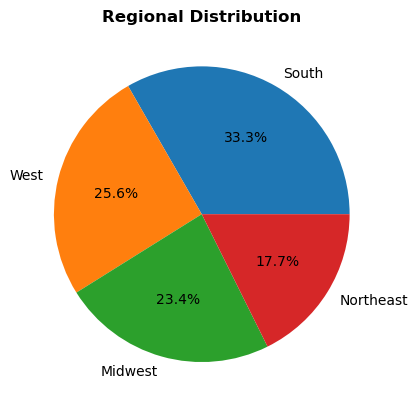

In [16]:
regional_distribution = df_project_all['region'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%')
plt.title('Regional Distribution', fontweight = 'bold')
plt.ylabel(None)

Text(0.5, 1.0, 'Loyalty Status')

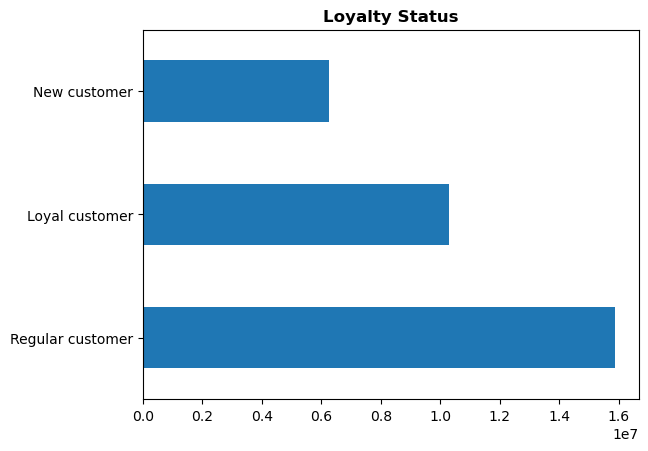

In [20]:
loyalty_flag = df_project_all['loyalty_flag'].value_counts().plot.barh()
plt.title('Loyalty Status', fontweight = 'bold')

In [32]:
cross_frequency_region = pd.crosstab(df_project_all['region'], df_project_all['order_frequency_flag'], dropna = False)
cross_frequency_region

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,5017709,863419,1716197
Northeast,3804566,630182,1287988
South,7192372,1215088,2384420
West,5545206,927748,1819959


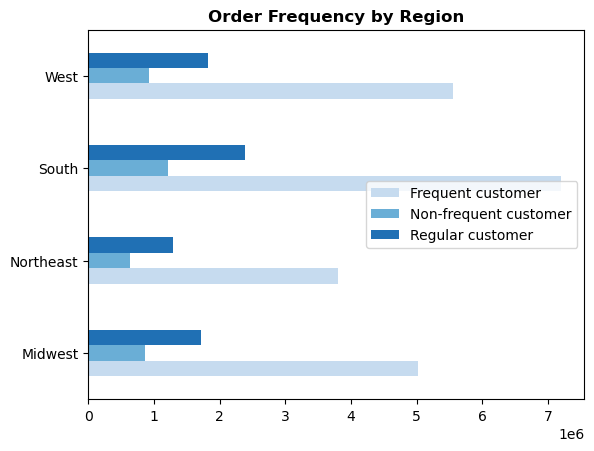

In [55]:
frequency_region = cross_frequency_region.plot.barh(color = sns.color_palette('Blues', 3))
plt.ylabel(None)
plt.title('Order Frequency by Region', fontweight = 'bold')
plt.legend(loc = 'right')
plt.show()

Text(0.5, 1.0, 'Frequency Status')

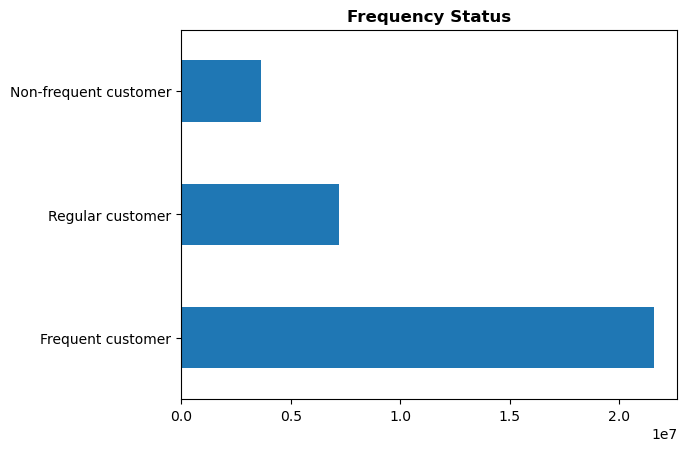

In [43]:
frequent_flag = df_project_all['order_frequency_flag'].value_counts().plot.barh()
plt.title('Frequency Status', fontweight = 'bold')

In [44]:
df_project_all['days_since_prior_order'].describe()

count    3.032876e+07
mean     1.110408e+01
std      8.779064e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [45]:
df_project_all['median_prior_orders'].describe()

count    3.240485e+07
mean     1.039776e+01
std      7.131754e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.300000e+01
max      3.000000e+01
Name: median_prior_orders, dtype: float64

In [47]:
df_project_all['age_group'].value_counts(dropna = False)

Less than 30 years    6090441
70+ years             6079991
40-49 years           5109237
30-39 years           5073751
50-59                 5064175
60-69 years           4987264
Name: age_group, dtype: int64

In [49]:
cross_frequency_family = pd.crosstab(df_project_all['family_status'], df_project_all['order_frequency_flag'], dropna = False)
cross_frequency_family

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_status,,,
divorced/widowed,1852101,306903,612808
living with parents and siblings,1047100,175019,328484
married,15137381,2564637,5054730
single,3523271,589878,1212542


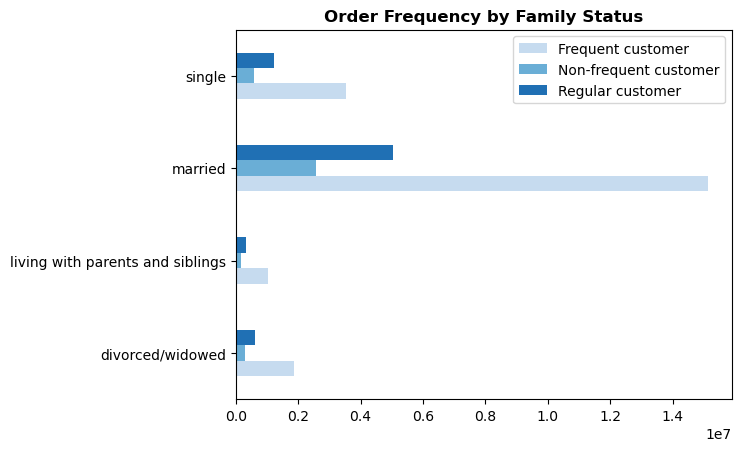

In [52]:
frequency_familyst = cross_frequency_family.plot.barh(color = sns.color_palette('Blues', 3))
plt.ylabel(None)
plt.title('Order Frequency by Family Status', fontweight = 'bold')
plt.legend(loc = 'best')
plt.show()

In [57]:
# Due to a memory error, I couldn't merge df_dept and df_project_all, therefore I used another method by adding one column using a for loop
# Create a new variable (department) and assign department_id to department variable using for loop

department = []

for value in df_project_all['department_id']:
    if value == 1:
        department.append('frozen')
    elif value == 2:
        department.append('other')
    elif value == 3:
        department.append('bakery')
    elif value == 4:
        department.append('produce')
    elif value == 5:
        department.append('alcohol')
    elif value == 6:
        department.append('international')
    elif value == 7:
        department.append('beverages')
    elif value == 8:
        department.append('pets')
    elif value == 9:
        department.append('dry goods pasta')
    elif value == 10:
        department.append('bulk')
    elif value == 11:
        department.append('personal care')
    elif value == 12:
        department.append('meat seafood')
    elif value == 13:
        department.append('pantry')
    elif value == 14:
        department.append('breakfast')
    elif value == 15:
        department.append('canned goods')
    elif value == 16:
        department.append('dairy eggs')
    elif value == 17:
        department.append('household')
    elif value == 18:
        department.append('babies')
    elif value == 19:
        department.append('snacks')
    elif value == 20:
        department.append('deli')
    else:
        department.append('missing')

In [58]:
# Insert department as column in df_project_all

df_project_all['department'] = department

In [59]:
# Create a crosstab between the 'department' and 'region' column

crosstab_department_region = pd.crosstab(df_project_all['department'], df_project_all['region'], dropna = False)
crosstab_department_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


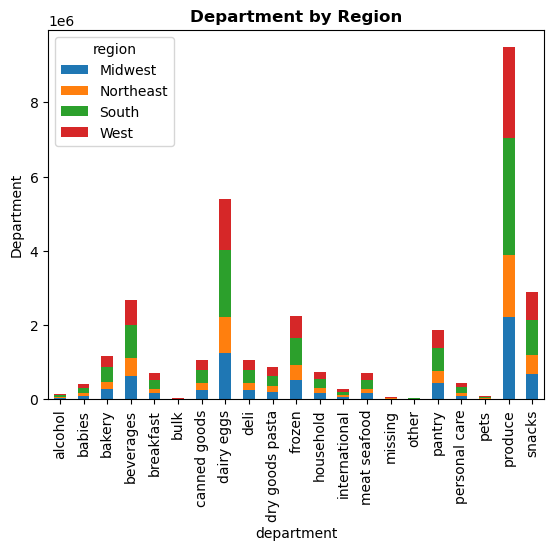

In [60]:
region_dept = crosstab_department_region.plot.bar(stacked = True)
plt.title('Department by Region', fontweight = 'bold')
plt.ylabel('Department')
plt.show()

In [61]:
df_project_all.groupby('income_group')['prices'].mean()

income_group
High-income        7.965269
Low-income         7.284196
Moderate-income    7.957462
Wealthy            7.956931
Name: prices, dtype: float64

In [62]:
# Create a crosstab between the 'family_status' and 'income_group' column

crosstab_family_status_income = pd.crosstab(df_project_all['family_status'], df_project_all['income_group'], dropna = False)
crosstab_family_status_income

income_group,High-income,Low-income,Moderate-income,Wealthy
family_status,,,,
divorced/widowed,986160,352814,373721,1059117
living with parents and siblings,102403,693454,736798,17948
married,5963347,5385903,5357517,6049986
single,1049240,1669043,1633171,974237


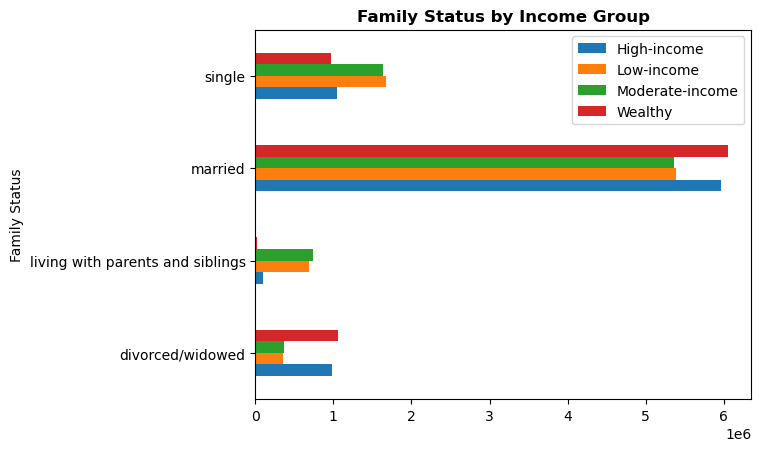

In [64]:
# Creating a bar chart of family status divided by income group


bar_family_status_income = crosstab_family_status_income.plot.barh()
plt.ylabel('Family Status')
plt.legend(loc='best')
plt.title('Family Status by Income Group', fontweight = 'bold')
plt.show()

In [66]:
cross_frequency_loyalty = pd.crosstab(df_project_all['loyalty_flag'], df_project_all['order_frequency_flag'], dropna = False)
cross_frequency_loyalty

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1648671,2724962,1870352
Regular customer,9631222,911475,5334079


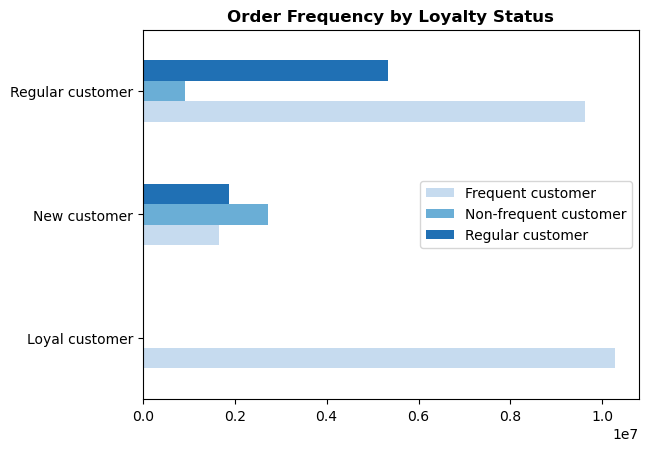

In [67]:
frequency_region = cross_frequency_loyalty.plot.barh(color = sns.color_palette('Blues', 3))
plt.ylabel(None)
plt.title('Order Frequency by Loyalty Status', fontweight = 'bold')
plt.legend(loc = 'right')
plt.show()

In [69]:
frequency_loyalty = df_project_all.groupby('loyalty_flag')['days_since_prior_order'].median()
frequency_loyalty

loyalty_flag
Loyal customer       5.0
New customer        17.0
Regular customer     9.0
Name: days_since_prior_order, dtype: float64

In [ ]:
frequency_loyalty = df_project_all.groupby('loyalty_flag')['days_since_prior_order'].median().plot.barh()
plt.title('Order Frequency by Loyalty Status', fontweight = 'bold')
plt.ylabel('Median Prior Orders')
plt.xlabel(None)
plt.show()

In [74]:
df_project_all.shape

(32404859, 35)

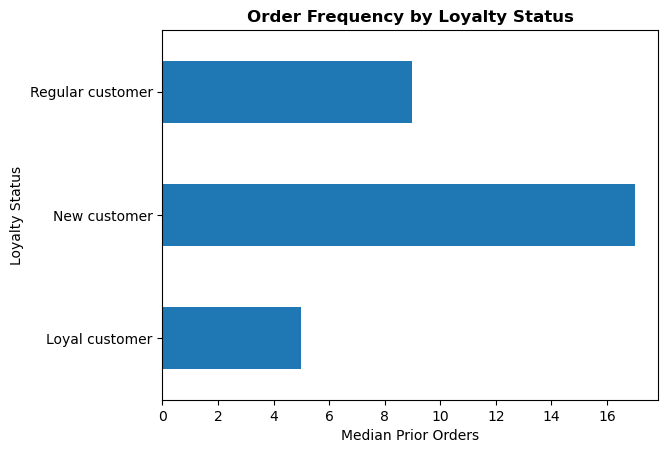

In [76]:
frequency_loyalty = df_project_all.groupby('loyalty_flag')['days_since_prior_order'].median().plot.barh()
plt.title('Order Frequency by Loyalty Status', fontweight = 'bold')
plt.xlabel('Median Prior Orders')
plt.ylabel('Loyalty Status')
plt.show()

In [78]:
frequency_loyalty = df_project_all.groupby('loyalty_flag')['days_since_prior_order'].median()
frequency_loyalty

loyalty_flag
Loyal customer       5.0
New customer        17.0
Regular customer     9.0
Name: days_since_prior_order, dtype: float64

In [79]:
avgprice_loyalty = df_project_all.groupby('loyalty_flag')['prices'].mean()
avgprice_loyalty

loyalty_flag
Loyal customer      7.773526
New customer        7.801190
Regular customer    7.798239
Name: prices, dtype: float64

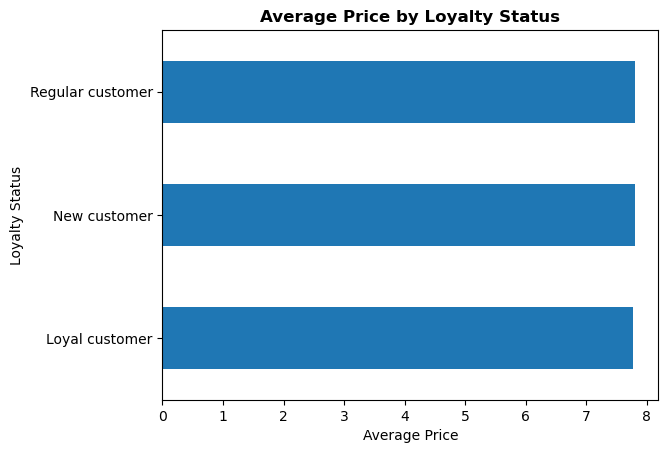

In [82]:
avgprice_loyalty_bar = df_project_all.groupby('loyalty_flag')['prices'].mean().plot.barh()
plt.title('Average Price by Loyalty Status', fontweight = 'bold')
plt.xlabel('Average Price')
plt.ylabel('Loyalty Status')
plt.show()

In [103]:
# Create a crosstab between the 'region' and 'spending_flag' column

crosstab_loyalty_region = pd.crosstab(df_project_all['region'], df_project_all['loyalty_flag'], dropna = False)
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


In [100]:
# Add additional information

crosstab_loyalty_region['Total customer'] = crosstab_loyalty_region.sum(axis = 1)
crosstab_loyalty_region['% Loyal customer'] = crosstab_loyalty_region['Loyal customer'] / crosstab_loyalty_region['Total customer'] * 100
crosstab_loyalty_region['% New customer'] = crosstab_loyalty_region['New customer'] / crosstab_loyalty_region['Total customer'] * 100
crosstab_loyalty_region['% Regular customer'] = crosstab_loyalty_region['Regular customer'] / crosstab_loyalty_region['Total customer'] * 100
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer,Total customer,% Loyal customer,% New customer,% Regular customer
region,,,,,,,
Midwest,2373774,1472573,3750978,7597325,31.244866,19.382783,49.372351
Northeast,1841785,1100207,2780744,5722736,32.183644,19.225192,48.591163
South,3405844,2074410,5311631,10791885,31.559306,19.221943,49.218751
West,2662690,1596800,4033423,8292913,32.108018,19.254995,48.636987


In [136]:
# Create a crosstab between the 'region' and 'spending_flag' column

crosstab_spending_region = pd.crosstab(df_project_all['region'], df_project_all['spending_flag'], dropna = False)

In [137]:
# Display the crosstab

crosstab_spending_region

spending_flag,High spender,Low spender
region,,
Midwest,29444,7567881
Northeast,18662,5704074
South,40905,10750980
West,31347,8261566


In [138]:
# Add additional information

crosstab_spending_region['Total'] = crosstab_spending_region.sum(axis = 1)
crosstab_spending_region['% High spender'] = crosstab_spending_region['High spender'] / crosstab_spending_region['Total'] * 100
crosstab_spending_region['% Low spender'] = crosstab_spending_region['Low spender'] / crosstab_spending_region['Total'] * 100
crosstab_spending_region

spending_flag,High spender,Low spender,Total,% High spender,% Low spender
region,,,,,
Midwest,29444,7567881,7597325,0.387557,99.612443
Northeast,18662,5704074,5722736,0.326103,99.673897
South,40905,10750980,10791885,0.379035,99.620965
West,31347,8261566,8292913,0.377997,99.622003
